In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../Data/fraud_clean_new.csv")   


In [3]:
df.shape



(6362620, 8)

In [4]:
df.columns


Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [5]:
df.dtypes


step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [6]:
df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [7]:
df.tail()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,850002.52,0.0,6510099.11,7360101.63,1


In [8]:
df.isnull().sum()


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [9]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df['isFraud'].value_counts(normalize=True) * 100


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

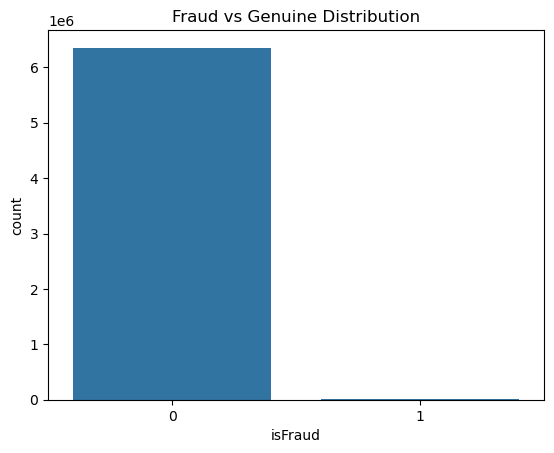

In [11]:
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Genuine Distribution")
plt.show()


In [12]:
df['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [13]:
pd.crosstab(df['type'], df['isFraud'])


isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


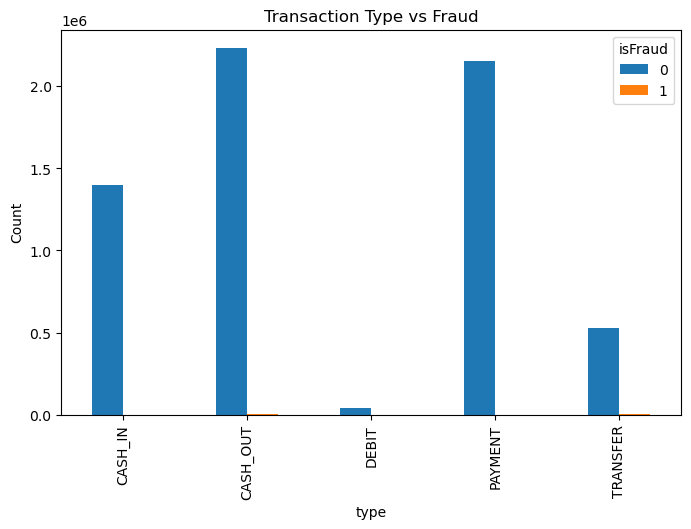

In [14]:
pd.crosstab(df['type'], df['isFraud']).plot(kind='bar', figsize=(8,5))
plt.title("Transaction Type vs Fraud")
plt.ylabel("Count")
plt.show()


In [15]:
df['amount'].describe()


count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [16]:
df.groupby('isFraud')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,6354407.0,1.781970e+05,5.962370e+05,0.01,13368.395,74684.72,208364.76,92445516.64
1,8213.0,1.467967e+06,2.404253e+06,0.00,127091.330,441423.44,1517771.48,10000000.00


In [17]:
df['orig_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']


In [18]:
df['dest_diff'] = df['newbalanceDest'] - df['oldbalanceDest']


In [19]:
df[df['isFraud'] == 1][['amount', 'orig_diff', 'dest_diff']].head()



,amount,orig_diff,dest_diff
2,181.0,181.0,0.0
3,181.0,181.0,-21182.0
251,2806.0,2806.0,0.0
252,2806.0,2806.0,-26202.0
680,20128.0,20128.0,0.0


In [20]:
df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]


In [21]:
df['type'].value_counts()


type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [22]:
df['isFraud'].value_counts(normalize=True) * 100


isFraud
0    99.703546
1     0.296454
Name: proportion, dtype: float64

In [23]:
df['orig_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

df['orig_zero'] = (df['newbalanceOrig'] == 0).astype(int)
df['dest_unchanged'] = (df['dest_diff'] == 0).astype(int)


In [24]:
df[['amount',
    'oldbalanceOrg','newbalanceOrig',
    'oldbalanceDest','newbalanceDest',
    'orig_diff','dest_diff',
    'orig_zero','dest_unchanged',
    'isFraud']].head(10)


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,orig_diff,dest_diff,orig_zero,dest_unchanged,isFraud
2,181.00,181.00,0.0,0.0,0.00,181.00,0.00,1,1,1
3,181.00,181.00,0.0,21182.0,0.00,181.00,-21182.00,1,0,1
15,229133.94,15325.00,0.0,5083.0,51513.44,15325.00,46430.44,1,0,0
19,215310.30,705.00,0.0,22425.0,0.00,705.00,-22425.00,1,0,0
24,311685.89,10835.00,0.0,6267.0,2719172.89,10835.00,2712905.89,1,0,0
42,110414.71,26845.41,0.0,288800.0,2415.16,26845.41,-286384.84,1,0,0
47,56953.90,1942.02,0.0,70253.0,64106.18,1942.02,-6146.82,1,0,0
48,5346.89,0.00,0.0,652637.0,6453430.91,0.00,5800793.91,1,0,0
51,23261.30,20411.53,0.0,25742.0,0.00,20411.53,-25742.00,1,0,0
58,62610.80,79114.00,16503.2,517.0,8383.29,62610.80,7866.29,0,0,0


In [25]:
df[df['isFraud'] == 1][
    ['amount','orig_diff','dest_diff','orig_zero','dest_unchanged']
].head(10)


,amount,orig_diff,dest_diff,orig_zero,dest_unchanged
2,181.00,181.00,0.00,1,1
3,181.00,181.00,-21182.00,1,0
251,2806.00,2806.00,0.00,1,1
252,2806.00,2806.00,-26202.00,1,0
680,20128.00,20128.00,0.00,1,1
681,20128.00,20128.00,5877.85,1,0
724,416001.33,0.00,9291517.62,1,0
969,1277212.77,1277212.77,0.00,1,1
970,1277212.77,1277212.77,2444985.19,1,0
1115,35063.63,35063.63,0.00,1,1


In [26]:
df['type'] = df['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})


In [27]:
df[['type']].head()


,type
2,0
3,1
15,1
19,0
24,0


In [28]:
df['type'].isnull().sum()


np.int64(0)

In [29]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [30]:
X.columns



Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'orig_diff', 'dest_diff',
       'orig_zero', 'dest_unchanged'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify=y,        # imbalance preserve
    random_state=42
)


In [32]:
from sklearn.ensemble import RandomForestClassifier

fraud_detection = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

fraud_detection.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_pred = fraud_detection.predict(X_test)


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[[690500     50]
 [   393   1660]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    690550
           1       0.97      0.81      0.88      2053

    accuracy                           1.00    692603
   macro avg       0.99      0.90      0.94    692603
weighted avg       1.00      1.00      1.00    692603

Accuracy: 0.9993603839428937


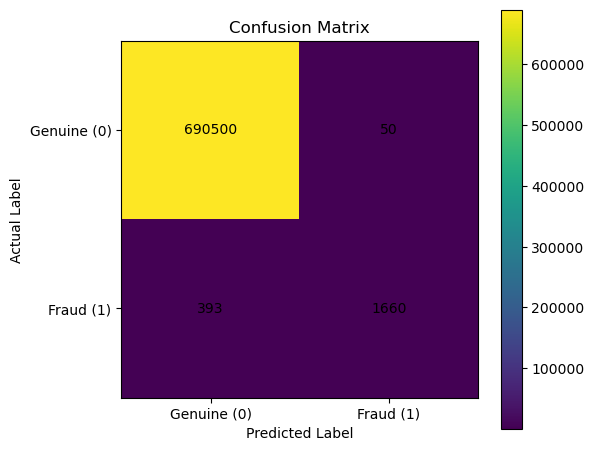

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix nikaalo
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

# Numbers likh do cells ke andar
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks([0, 1], ['Genuine (0)', 'Fraud (1)'])
plt.yticks([0, 1], ['Genuine (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()



In [36]:


# Feature importance values
importances = fraud_detection.feature_importances_

# Feature names
features = X.columns

# DataFrame bana lo (easy view ke liye)
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)


           feature  importance
7        orig_diff    0.289372
3    oldbalanceOrg    0.216514
10  dest_unchanged    0.092466
8        dest_diff    0.092148
2           amount    0.089143
6   newbalanceDest    0.071850
0             step    0.039817
4   newbalanceOrig    0.036362
9        orig_zero    0.033983
1             type    0.020144
5   oldbalanceDest    0.018201


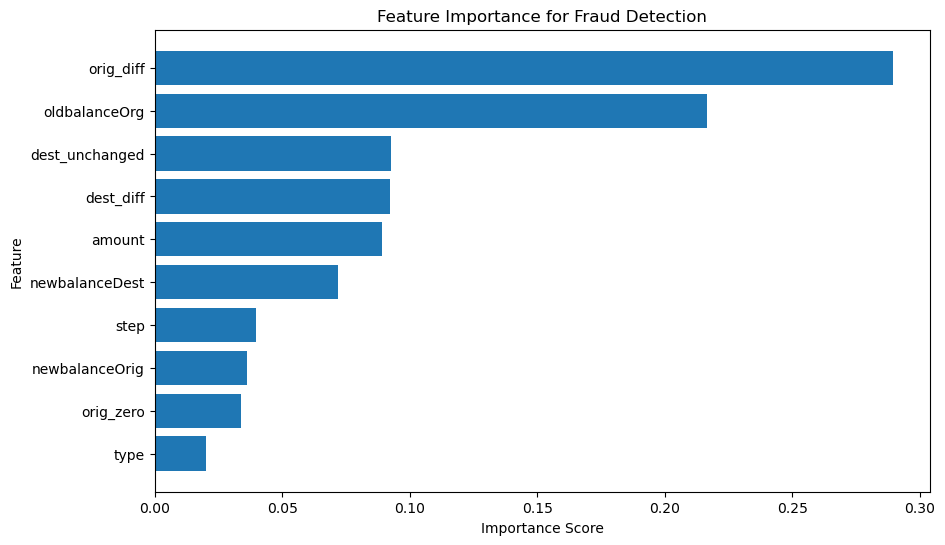

In [37]:


# Top 10 features (already sorted maana ja raha hai)
top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.gca().invert_yaxis()   # sabse important upar
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Fraud Detection")
plt.show()


In [38]:
y_prob = fraud_detection.predict_proba(X_test)[:, 1]


In [39]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC and AUC Score:", roc_auc)


ROC and AUC Score: 0.9969107341991423


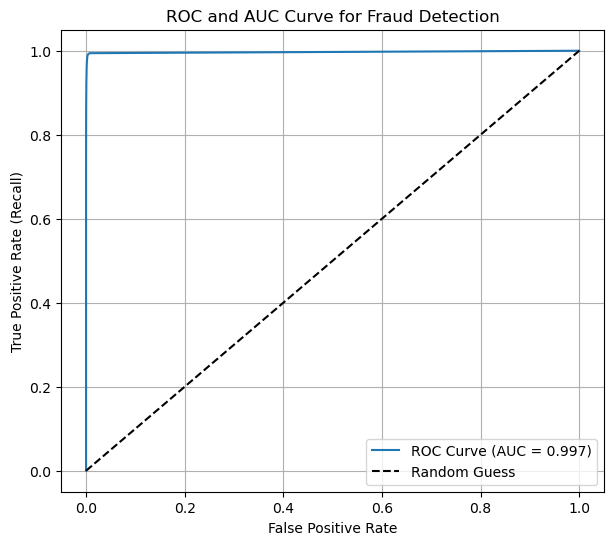

In [40]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC and AUC Curve for Fraud Detection')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [41]:
import os
os.getcwd()


'd:\\Life_Insurance_Claim_Prediction\\notebooks'

In [42]:
import joblib

joblib.dump(
    fraud_detection,
    r"D:\Life_Insurance_Claim_Prediction\models\fraud_model.pkl"
)

print("Fraud model saved successfully")



Fraud model saved successfully


In [43]:
joblib.load(
    r"D:\Life_Insurance_Claim_Prediction\models\fraud_model.pkl"
)
print("Fraud model load OK")


Fraud model load OK
